In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("ggplot")

In [5]:
SuperMarket = pd.read_csv("Python Project Data - Supermarket Sales.csv")
SuperMarket

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,750-67-8428,A,1,0,0,Normal,Male,Health and beauty,74.69,7,26.1415,NaN,1/5/2019,13:08,Ewallet,9.1
1,226-31-3081,C,0,1,0,Normal,Male,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,9.6
2,631-41-3108,A,1,0,0,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,7.4
3,123-19-1176,A,1,0,0,Normal,Male,Health and beauty,58.22,8,NaN,489.0480,1/27/2019,8 - 30 PM,Ewallet,8.4
4,373-73-7910,A,1,0,0,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,861-77-0145,C,0,1,0,Member,Male,Electronic accessories,81.97,10,40.9850,860.6850,3/3/2019,14:30,Cash,9.2
1002,479-26-8945,B,0,0,1,Member,Female,Sports and travel,16.49,2,1.6490,34.6290,2/5/2019,11:32,Ewallet,4.6
1003,210-67-5886,C,0,1,0,Member,Female,Health and beauty,98.21,3,14.7315,309.3615,2/5/2019,10:41,Credit card,7.8
1004,227-78-1148,B,0,0,1,Normal,Female,Fashion accessories,72.84,7,25.4940,535.3740,2/15/2019,12:44,Cash,8.4


In [6]:
 SuperMarket.head()

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,750-67-8428,A,1,0,0,Normal,Male,Health and beauty,74.69,7,26.1415,NaN,1/5/2019,13:08,Ewallet,9.1
1,226-31-3081,C,0,1,0,Normal,Male,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,9.6
2,631-41-3108,A,1,0,0,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,7.4
3,123-19-1176,A,1,0,0,Normal,Male,Health and beauty,58.22,8,NaN,489.0480,1/27/2019,8 - 30 PM,Ewallet,8.4
4,373-73-7910,A,1,0,0,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,5.3


In [7]:
SuperMarket.describe()

,Yangon,Naypyitaw,Mandalay,Quantity,Tax 5%,Total,Rating
count,1006.000000,1006.000000,1006.000000,1006.000000,997.000000,1003.000000,1006.000000
mean,0.338966,0.329026,0.332008,5.469185,15.479682,322.734689,7.056163
std,0.473594,0.470093,0.471168,3.014153,11.728320,245.865964,3.318751
min,0.000000,0.000000,0.000000,-8.000000,0.508500,10.678500,4.000000
25%,0.000000,0.000000,0.000000,3.000000,5.986500,123.789750,5.500000
50%,0.000000,0.000000,0.000000,5.000000,12.227500,254.016000,7.000000
75%,1.000000,1.000000,1.000000,8.000000,22.720500,471.009000,8.500000
max,1.000000,1.000000,1.000000,10.000000,49.650000,1042.650000,97.000000


In [10]:
SuperMarket.dropna(inplace=True)
SuperMarket.drop_duplicates(inplace=True)

In [12]:
SuperMarket.isnull().sum()

Invoice ID       0
Branch           0
Yangon           0
Naypyitaw        0
Mandalay         0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Tax 5%           0
Total            0
Date             0
Time             0
Payment          0
Rating           0
dtype: int64

In [13]:
SuperMarket.duplicated().sum()

0

In [14]:
if 'Date' in SuperMarket.columns:
    SuperMarket['Date'] = pd.to_datetime(SuperMarket['Date'])


In [15]:
SuperMarket["Payment"] = SuperMarket["Payment"].astype("category").cat.codes  
SuperMarket["Total"] = SuperMarket["Total"] / SuperMarket["Total"].max()

In [20]:
SuperMarket.to_csv("cleaned_data.csv", index=False)

C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128722 (\N{SHOPPING TROLLEY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


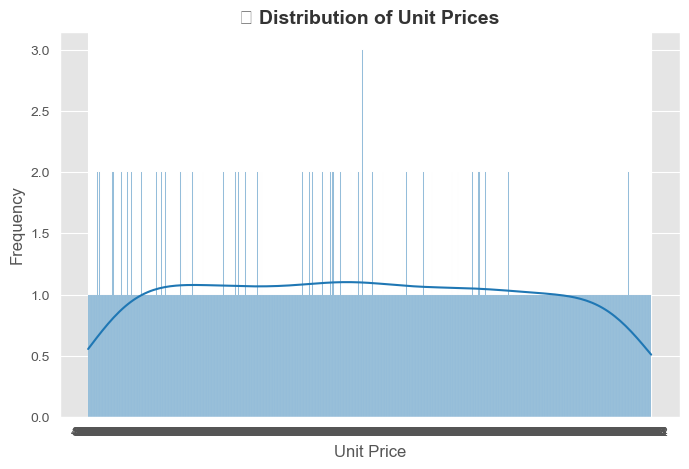

In [21]:
plt.figure(figsize=(8, 5))
sns.histplot(SuperMarket['Unit price'], bins=30, kde=True, color='#1f77b4')
plt.title('Distribution of Unit Prices', fontsize=14, fontweight='bold', color='#333')
plt.xlabel('Unit Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_16440\3356941124.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=SuperMarket['Product line'], y=SuperMarket['Unit price'], palette='pastel')


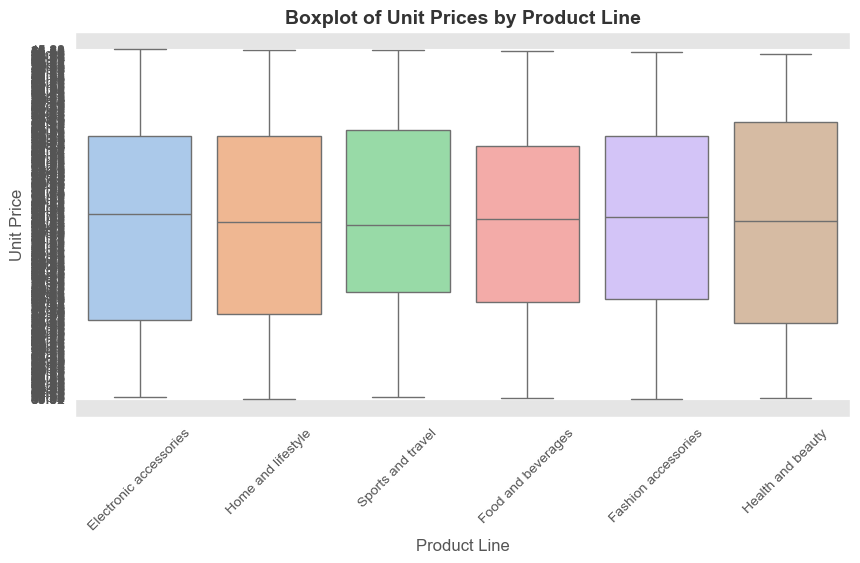

In [23]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=SuperMarket['Product line'], y=SuperMarket['Unit price'], palette='pastel')
plt.xticks(rotation=45)
plt.title('Boxplot of Unit Prices by Product Line', fontsize=14, fontweight='bold', color='#333')
plt.xlabel('Product Line', fontsize=12)
plt.ylabel('Unit Price', fontsize=12)
plt.show()

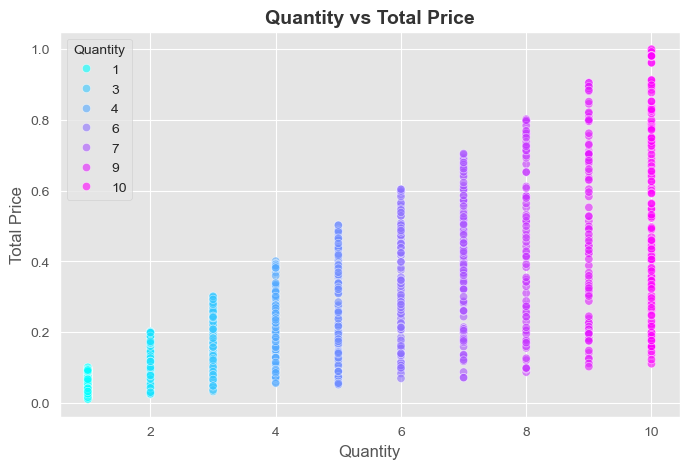

In [24]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=SuperMarket['Quantity'], y=SuperMarket['Total'], alpha=0.6, palette='cool', hue=SuperMarket['Quantity'])
plt.title('Quantity vs Total Price', fontsize=14, fontweight='bold', color='#333')
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Total Price', fontsize=12)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_16440\344714446.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Branch', y='Total', data=branch_sales, palette='magma')


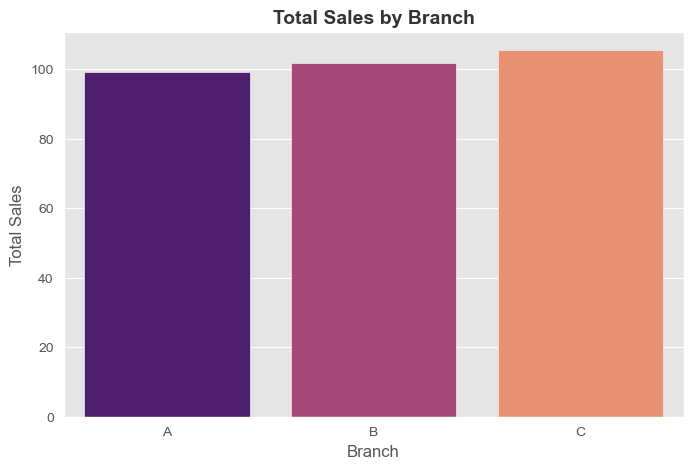

In [25]:
plt.figure(figsize=(8, 5))
branch_sales = SuperMarket.groupby('Branch')['Total'].sum().reset_index()
sns.barplot(x='Branch', y='Total', data=branch_sales, palette='magma')
plt.title('Total Sales by Branch', fontsize=14, fontweight='bold', color='#333')
plt.xlabel('Branch', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.show()

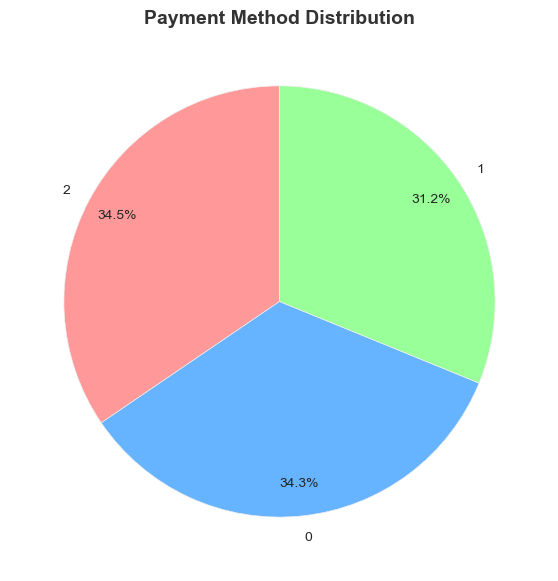

In [26]:
plt.figure(figsize=(7, 7))
payment_counts = SuperMarket['Payment'].value_counts()
colors = ['#ff9999', '#66b3ff', '#99ff99']
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', colors=colors, startangle=90, pctdistance=0.85)
plt.gca().set_title('Payment Method Distribution', fontsize=14, fontweight='bold', color='#333')
plt.show()

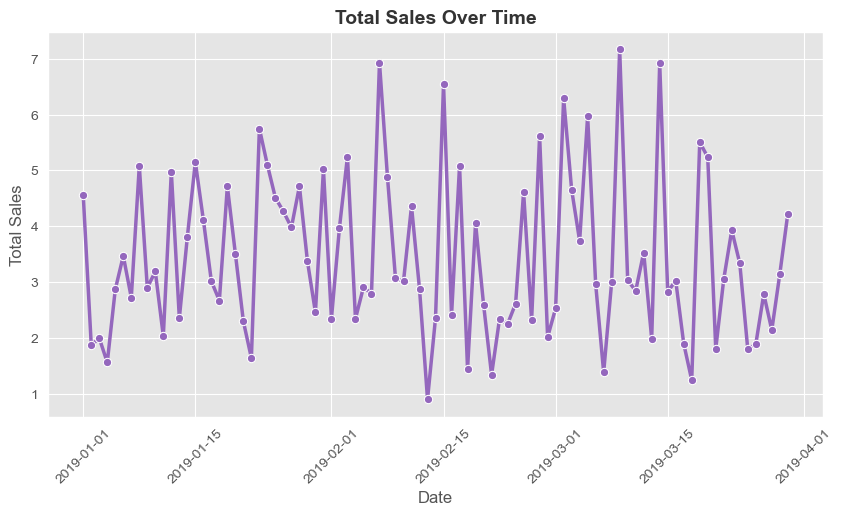

In [27]:
plt.figure(figsize=(10, 5))
SuperMarket_sorted = SuperMarket.groupby('Date')['Total'].sum().reset_index()
sns.lineplot(x='Date', y='Total', data=SuperMarket_sorted, marker='o', color='#9467bd', linewidth=2.5)
plt.title('Total Sales Over Time', fontsize=14, fontweight='bold', color='#333')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.show()


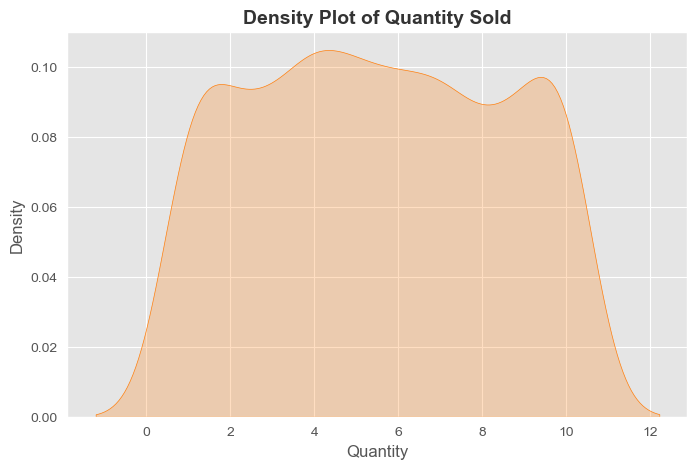

In [28]:
plt.figure(figsize=(8, 5))
sns.kdeplot(SuperMarket['Quantity'], fill=True, color='#ff7f0e')
plt.title('Density Plot of Quantity Sold', fontsize=14, fontweight='bold', color='#333')
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()